# Proporção de dados

Paleta de cores

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Importando a base de dados com o PIB dos estados brasileiros de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")

In [4]:
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [5]:
# Verificando os tipos de dados e se existem dados nulos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


Pergunta 1: Como está disposto o PIB nos Estados brasileiros no ano de 2020? É possível notar os Estados com maior e menor participação no PIB nacional?

In [6]:
# Criando um df com os dados desejados
df_pib_2020 = df_pib.copy()
df_pib_2020 = df_pib_2020.query("ano == 2020").set_index('sigla_uf').sort_values('pib', ascending=False)[['pib']]

df_pib_2020.head()

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


In [7]:
# Importando as bibliotecas
import matplotlib.pyplot as plt

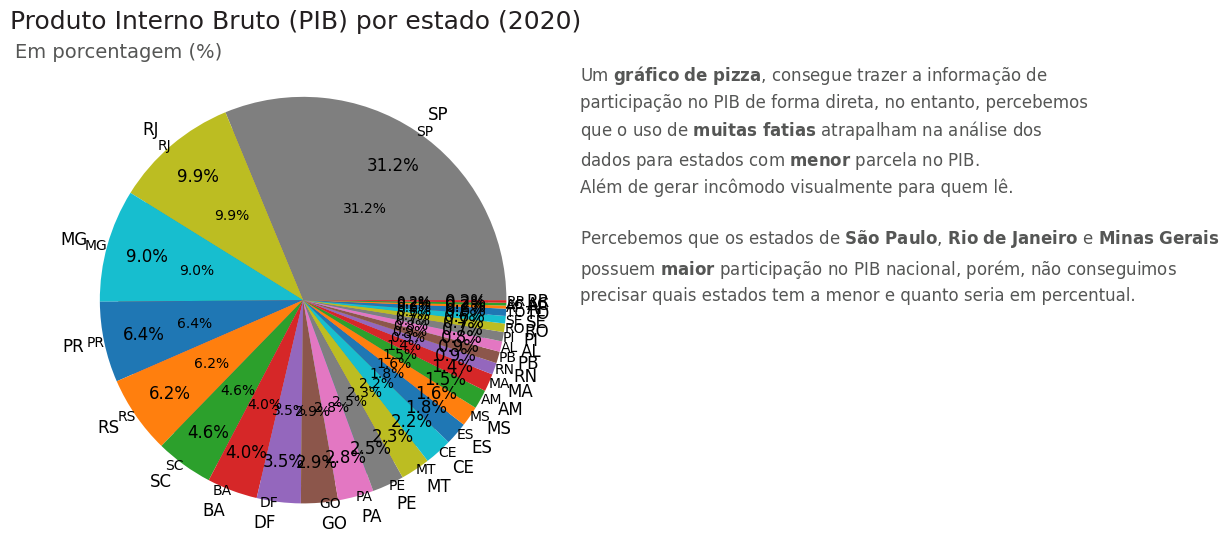

In [8]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct = "%.1f%%")

# Gerando o gráfico de pizza
ax.pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct = "%.1f%%",
       radius = 1.1, pctdistance=0.8, textprops={"size":12})

# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por estado (2020)', size=18, color=CINZA1)
plt.title('Em porcentagem (%)', fontsize=14, color=CINZA3, pad = 15, x = 0.1, y = 0.98 )

# Anotando uma conclusão no gráfico
ax.text(1.1, 0.5,
         'Um $\\bf{gráfico\ de\ pizza}$, consegue trazer a informação de\n'
         'participação no PIB de forma direta, no entanto, percebemos\n'
         'que o uso de $\\bf{muitas\ fatias}$ atrapalham na análise dos\n'
         'dados para estados com $\\bf{menor}$ parcela no PIB.\n'
         'Além de gerar incômodo visualmente para quem lê.\n\n'
         'Percebemos que os estados de $\\bf{São\ Paulo}$, $\\bf{Rio\ de\ Janeiro}$ e $\\bf{Minas\ Gerais}$\n'
         'possuem $\\bf{maior}$ participação no PIB nacional, porém, não conseguimos\n'
         'precisar quais estados tem a menor e quanto seria em percentual.',
         fontsize=12,
         linespacing=1.45,
         color=CINZA3, transform= ax.transAxes)

plt.show()

Pergunta 2: Houve uma significativa mudança na distribuição do PIB por região comparando os valores de 2002 e 2020?

In [9]:
# Criando um df com os dados desejados
df_pib_2002 = df_pib.query('ano == 2002')[['regiao', 'pib']]
df_pib_2020 = df_pib.query('ano == 2020')[['regiao', 'pib']]

df_pib_2002 = df_pib_2002.groupby('regiao').sum().sort_values('pib', ascending=False)
df_pib_2020 = df_pib_2020.groupby('regiao').sum().sort_values('pib', ascending=False)

display(df_pib_2002, df_pib_2020)

,pib
regiao,
Sudeste,854309793369
Sul,241564819092
Nordeste,194847656440
Centro-Oeste,128162640832
Norte,69902366306


,pib
regiao,
Sudeste,3952694729239
Sul,1308147455374
Nordeste,1079331030689
Centro-Oeste,791250735824
Norte,478173048893


Gerando um gráfico

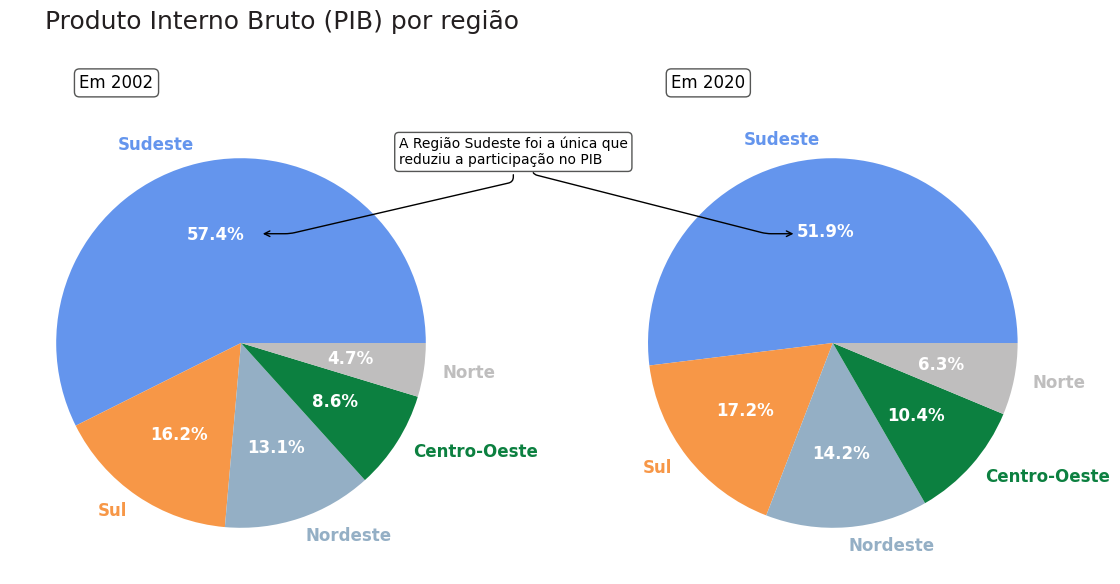

In [10]:
# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]

# Personalizando o gráfico
plt.suptitle('Produto Interno Bruto (PIB) por região', fontsize=18, color=CINZA1, ha = 'right', x = 0.5, y = 1.05)

# GRÁFICO 1 - PIB de 2002 por região
ptc, text, _ = axs[0].pie(data = df_pib_2002, x = "pib", labels = df_pib_2002.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)

# Título do Gráfico 1
axs[0].annotate("Em 2002", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

# GRÁFICO 2 - PIB de 2020 por região
ptc, text, _ = axs[1].pie(data = df_pib_2020, x = "pib", labels = df_pib_2020.index, autopct="%.1f%%",
                          pctdistance=0.6, textprops={"size": 12, "fontweight":"bold", "color": BRANCO},
                          colors = cores)

# Título do Gráfico 2
axs[1].annotate("Em 2020", xy=(50, 350), size =12, xycoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3))

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('A Região Sudeste foi a única que\nreduziu a participação no PIB',
            xy=(180, 245), xycoords='axes points', xytext=(280, 295), textcoords='axes points',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5"))

axs[1].annotate('\n\n', xy=(140, 245), xycoords='axes points', xytext=(-50, 295), textcoords='axes points',
            size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=-90,angleB=0,armA=30,armB=-30,rad=5"))

plt.show()

Pergunta 3: Qual a participação do Estado de Minas Gerais no PIB de todo o Brasil no ano de 2020?

In [11]:
# Criando um df com os dados desejados
df_mg_2020 = df_pib.query('ano == 2020')[['sigla_uf', 'pib']]

# Renomear todos os estados como "Outros" e mudar a sigla MG para Minas Gerais
df_mg_2020.loc[df_mg_2020['sigla_uf'] == 'MG', 'sigla_uf'] = 'Minas Gerais'
df_mg_2020.loc[df_mg_2020['sigla_uf'] != 'Minas Gerais', 'sigla_uf'] = 'Outros'

df_mg_2020 = df_mg_2020.groupby('sigla_uf').sum()
df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


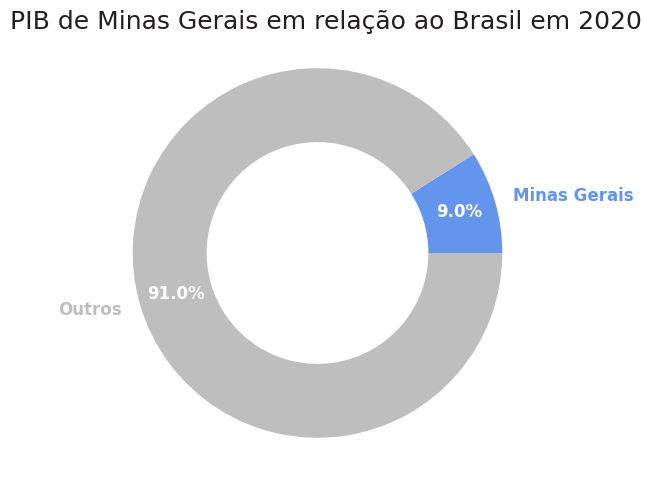

In [12]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,6))

# Definindo as cores do gráfico
cores = [AZUL3, CINZA5]

# Personalizando o gráfico
plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020', fontsize=18, color=CINZA1, ha = 'left', x = 0, y = 0.9)

# Gerando o gráfico do PIB de 2020 de Minas Gerais em relação a todo Brasil
ptc, text, _ = ax.pie(data = df_mg_2020, x= 'pib', labels=df_mg_2020.index,
                      autopct = "%.1f%%",
                      startangle = 0, pctdistance = 0.8, wedgeprops=dict(width=0.4),
                      textprops=dict(size=12, fontweight="bold", color= BRANCO),
                      colors = cores)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

In [13]:
# Criando um df com os dados desejados
pib_2020 = df_pib.copy()
pib_2020 = pib_2020.query("ano == 2020")[["regiao", "sigla_uf", "pib"]]

In [14]:
# Ajustando os valores do PIB para bilhões e ordenando pelo pib
pib_2020["pib"] = (pib_2020["pib"] / 1e9).round(0).astype("int64")
pib_2020 = pib_2020.sort_values("pib", ascending= False)

In [15]:
# Gerando uma coluna para a porcentagem da representação de cada Estado no PIB de 2020
pib_2020["pib_%"] = pib_2020["pib"].div(pib_2020["pib"].sum(), axis=0)
pib_2020["pib_%"] = (pib_2020["pib_%"] * 100).round(1)

pib_2020.head()

,regiao,sigla_uf,pib,pib_%
379,Sudeste,SP,2378,31.3
360,Sudeste,RJ,754,9.9
322,Sudeste,MG,683,9.0
398,Sul,PR,488,6.4
436,Sul,RS,471,6.2


In [16]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP) para o ano de 2020
fig = px.treemap(pib_2020, path=[px.Constant("Distribuição do PIB"), 'sigla_uf'], values='pib_%',
color='regiao', custom_data=['regiao','pib'],
title='Distribuição do PIB nos estados brasileiros no ano de 2020 (em bilhões de reais)',
color_discrete_map={'(?)': BRANCO,'Sudeste':AZUL3, 'Sul':LARANJA1, 'Nordeste':AZUL5,
'Centro-Oeste':VERDE1, 'Norte':CINZA5})

# Ajustando o layout do gráfico
fig.update_layout(width=1400, height=600, margin = dict(t=50, l=0, r=0, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= CINZA2, title_font_color= CINZA1, title_font_size=24)

# Ajustando o hovertext
fig.update_traces(marker=dict(cornerradius=3), texttemplate='<b>%{label}</b>',
hovertemplate='<b>Estado:</b> %{label} <br><b>Região</b> = %{customdata[0]} <br>'                                                                                             '<b>PIB</b> = R$ %{customdata[1]} bi (%{value}%)')
fig.show()

# Compondo os dados estáticos

Pergunta 4: Como está distribuído o PIB do Estado da Bahia em 2020 separado por impostos líquidos e os valores adicionados brutos dos bens e serviços produzidos?


In [17]:
bahia = df_pib.query("sigla_uf == 'BA' and ano == 2020")[["pib","impostos_liquidos", "va"]]
bahia.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace=True)
bahia

,PIB,Impostos Líquidos,Valor Adicionado Bruto
303,305320812691,37094030606,268226782074


In [18]:
bahia = bahia.melt(var_name = "Indicadores", value_name = "Valores")
bahia

,Indicadores,Valores
0,PIB,305320812691
1,Impostos Líquidos,37094030606
2,Valor Adicionado Bruto,268226782074


In [19]:
# Alterando os impostos para descréscimo, criando uma coluna com os valores em string e outra com as medidas

bahia.loc[bahia["Indicadores"] == "Impostos Líquidos", "Valores"] = bahia["Valores"] * -1
bahia["valores_str"] = (bahia["Valores"]/1e9).map("R$ {:,.2f} Bi".format)
bahia["Medidas"] = ["absolute", "relative", "total"]

bahia

,Indicadores,Valores,valores_str,Medidas
0,PIB,305320812691,R$ 305.32 Bi,absolute
1,Impostos Líquidos,-37094030606,R$ -37.09 Bi,relative
2,Valor Adicionado Bruto,268226782074,R$ 268.23 Bi,total


In [20]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import plotly.graph_objects as go

# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", orientation = "v", measure = bahia["Medidas"],
                             x = bahia["Indicadores"],  y = bahia["Valores"],
                             text = bahia["valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             ))

# Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) da Bahia em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,380e9], hovermode="closest")

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

Pergunta 5:
Qual a evolução anual do PIB do Estado do Rio de Janeiro entre os anos de 2010 a 2020?

In [21]:
# Selecionando os dados do RJ

anos = [x for x in range(2010,2021)]
rio = df_pib.query("sigla_uf == 'RJ' and ano == @anos")[["ano", "pib"]]
rio = rio.reset_index(drop=True)
rio

,ano,pib
0,2010,449858101109
1,2011,512767904769
2,2012,574884973130
3,2013,628226069362
4,2014,671076844311
5,2015,659138951833
6,2016,640401206447
7,2017,671605668055
8,2018,758859046865
9,2019,779927917084


In [22]:
# Gerando uma coluna com a variação do pib e passando o valor
# do PIB inicial para a 1ª linha da variação pib
rio["variacao_pib"] = rio["pib"].diff().fillna(rio["pib"]).astype("int64")

# Gerando uma coluna com as Medidas para o gráfico de cascata
rio["Medidas"] = ["absolute"] + ["relative"] * 10

rio.head()

,ano,pib,variacao_pib,Medidas
0,2010,449858101109,449858101109,absolute
1,2011,512767904769,62909803660,relative
2,2012,574884973130,62117068361,relative
3,2013,628226069362,53341096232,relative
4,2014,671076844311,42850774949,relative


In [23]:
# Gerando uma observação com a atualização da última linha com o PIB total de 2020
atualizacao = pd.Series({'ano': 'Total',
                         'pib': rio["pib"].values[-1],
                         'variacao_pib': rio["pib"].values[-1],
                         'Medidas': "total"}).to_frame().T

# Concatenando o df com a atualização e retirando a coluna pib
rio = pd.concat([rio, atualizacao], axis = 0, ignore_index=True)
rio = rio.drop(columns=["pib"])

# Ajustando a formatação do PIB e renomeando colunas
rio["variacao_pib_texto"] = (rio["variacao_pib"]/1e9).map('R$ {:,.2f} Bi'.format)
rio.rename(columns = {"ano":"Ano", "variacao_pib": "Variação do PIB", "variacao_pib_texto":"Variação do PIB (em texto)"}, inplace=True)
rio

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,449858101109,absolute,R$ 449.86 Bi
1,2011,62909803660,relative,R$ 62.91 Bi
2,2012,62117068361,relative,R$ 62.12 Bi
3,2013,53341096232,relative,R$ 53.34 Bi
4,2014,42850774949,relative,R$ 42.85 Bi
5,2015,-11937892478,relative,R$ -11.94 Bi
6,2016,-18737745386,relative,R$ -18.74 Bi
7,2017,31204461608,relative,R$ 31.20 Bi
8,2018,87253378810,relative,R$ 87.25 Bi
9,2019,21068870219,relative,R$ 21.07 Bi


In [24]:
import plotly.graph_objects as go
import numpy as np

# Gerando o gráfico de cascata
fig = go.Figure(
                go.Waterfall(name = "", orientation = "v", measure = rio["Medidas"],
                             y = rio["Variação do PIB"], text = rio["Variação do PIB (em texto)"],
                             textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)))

# Personalizando o gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Rio de Janeiro' +
                             '<br><sup size=1 style="color:#555655">De 2010 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,850e9])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=rio["Ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="O <b>Rio de Janeiro</b> apresentou recuo no PIB<br>em pelo menos 3 anos no período:<br>2015, 2016 e 2020",
                   align="left", axref = 'x', ayref='y', x=5, y=600e9, ax=8, ay=450e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)
fig.add_annotation(text="", axref = 'x', ayref='y', x=6, y=600e9, ax=8, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)
fig.add_annotation(text="", axref = 'x', ayref='y', x=10, y=710e9, ax=8.5, ay=530e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3)

fig.show()

# Compondo os dados dinâmicos

Pergunta 6: Como está distribuído o PIB nos 3 últimos quinquênios (lustro) dos dados (2010, 2015, 2020) na Região Sul do Brasil divididos pelos Estados (Paraná, Santa Catarina e Rio Grande do Sul)?

In [25]:
# Selecionando os dados da região Sul do Brasil
anos = [x for x in range(2010, 2021, 5)]
pib_sul = df_pib.query("regiao == 'Sul' and ano == @anos")[["ano", "sigla_uf", "pib"]]
pib_sul["pib"] = (pib_sul["pib"] / 1e9).round(2)
pib_sul = pib_sul.reset_index(drop=True)
pib_sul

,ano,sigla_uf,pib
0,2010,PR,225.21
1,2015,PR,376.96
2,2020,PR,487.93
3,2010,SC,153.73
4,2015,SC,249.08
5,2020,SC,349.28
6,2010,RS,241.25
7,2015,RS,381.99
8,2020,RS,470.94


In [26]:
pib_sul_cross = pd.crosstab(index = pib_sul.ano,
                 columns = pib_sul.sigla_uf,
                 values = pib_sul.pib,
                 aggfunc = "sum",
                 normalize = "index")
pib_cross = pib_sul_cross.reset_index()
pib_cross

sigla_uf,ano,PR,RS,SC
0,2010,0.363131,0.388994,0.247876
1,2015,0.373957,0.378947,0.247096
2,2020,0.372992,0.360005,0.267003


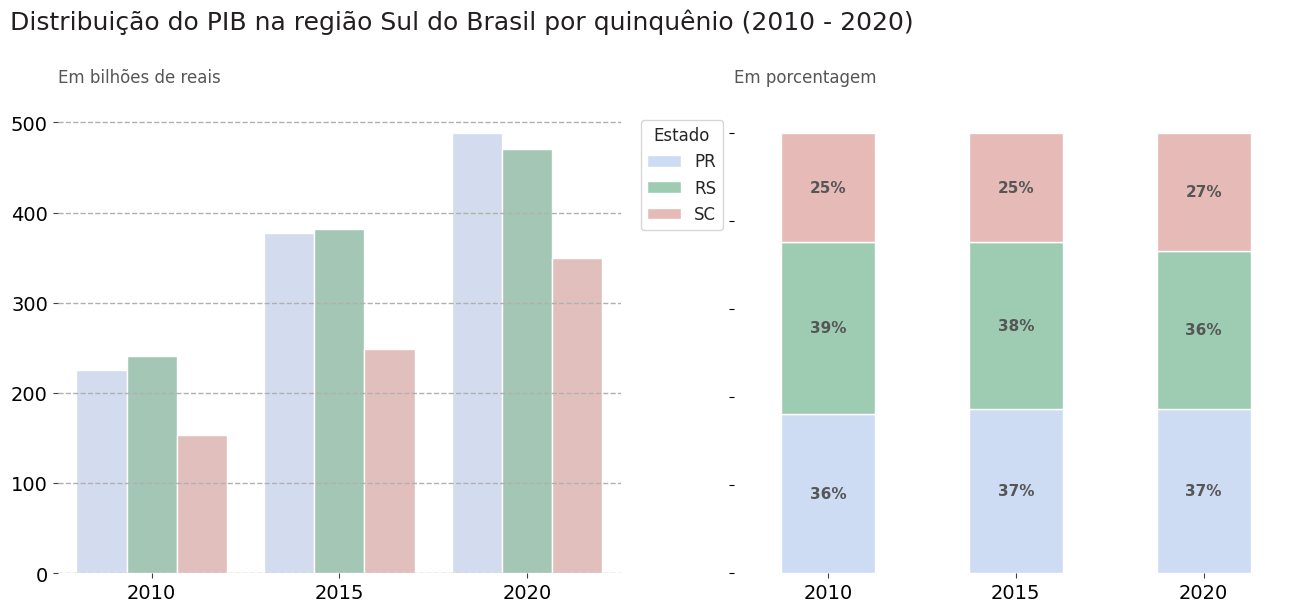

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(16,6))
sns.set_theme(style="white")

cores = [AZUL6, VERDE3, VERMELHO2]

fig.suptitle('Distribuição do PIB na região Sul do Brasil por quinquênio (2010 - 2020)',
             fontsize=18, color=CINZA1, ha = 'right', x = 0.66, y = 1.05)

# Gráfico 1:  Gráfico de colunas agrupadas
sns.barplot(data = pib_sul, x = "ano", y = "pib", hue = "sigla_uf", hue_order = ["PR", "RS", "SC"], ax = axs[0], palette = cores)

axs[0].set_title('Em bilhões de reais\n', color = CINZA3, loc = 'left')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].xaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# Remover a legenda e colocar grids no eixo y
axs[0].legend().remove()
axs[0].yaxis.grid(linestyle='--', linewidth=1)

# Gráfico 2
# GRÁFICO 2 - Gráfico de colunas empilhadas 100 %
pib_cross.plot(x = 'ano', kind = 'bar', stacked = True, color = cores, ax = axs[1])

axs[1].set_title('Em porcentagem\n', color = CINZA3, loc = 'left')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_yticklabels([])
axs[1].xaxis.set_tick_params(labelsize=14, color = CINZA2, labelrotation=0)
axs[1].set_frame_on(False)

# Adicionar a legenda entre os dois gráficos
axs[1].legend(bbox_to_anchor=(-0.005, 1), title='Estado', title_fontsize  = 12, fontsize = 12)

# Adicionando os valores dentro da coluna
for container in axs[1].containers:
    labels = [f'{valor.get_height()*100:.0f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 11, color = CINZA3, fontweight = "bold")

plt.show()

Pergunta 7: Como estão distribuídos, em porcentagem, os valores adicionados de bens e serviços descritos na base de dados em relação a cada região no ano de 2020?

In [28]:
# Selecionar os dados desejados
df_va_separado = df_pib.query('ano == 2020')[['regiao', 'va_servicos', 'va_industria', 'va_adespss', 'va_agropecuaria']]
df_va_separado = df_va_separado.reset_index(drop=True)
df_va_separado.head()

,regiao,va_servicos,va_industria,va_adespss,va_agropecuaria
0,Norte,19060688172,8285675423,12000339417,6891411669
1,Norte,6590543336,1191345379,6031050521,983531817
2,Norte,34795836262,35839810630,20210620577,5114449144
3,Norte,5278754961,1706511471,6538065265,1000907462
4,Norte,56395092425,84173852308,37614037902,19730656823


In [29]:
# Agrupar os dados por região
df_va_separado = df_va_separado.groupby('regiao').agg('sum')

# Normalizar os dados de cada região
df_va_separado = df_va_separado.div(df_va_separado.sum(axis=1), axis=0)
df_va_separado = df_va_separado.sort_values(by='va_servicos', axis=0)

df_va_separado

,va_servicos,va_industria,va_adespss,va_agropecuaria
regiao,,,,
Norte,0.338521,0.323217,0.239485,0.098777
Centro-Oeste,0.435471,0.153645,0.266185,0.144699
Nordeste,0.459790,0.191011,0.260121,0.089078
Sul,0.508060,0.252751,0.139648,0.099541
Sudeste,0.610871,0.228032,0.133536,0.027561


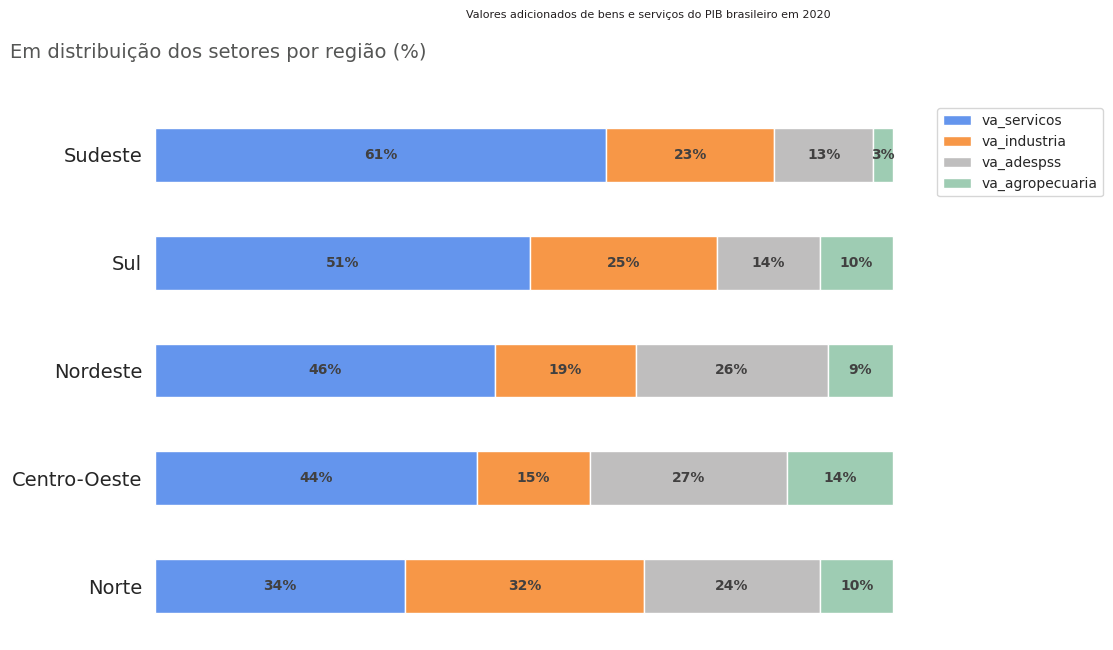

In [30]:
# Gerar a função para criar o gráfico de barras empilhadas

def grafico_va():
  # Importar a biblioteca
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,7))

  # Definir as cores do gráfico
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

  # Gerar o gráfico de barras empilhadas 100%
  df_va_separado.plot(kind="barh", stacked=True, color = cores, ax=ax)

  # Personalizar o gráfico
  plt.suptitle('Valores adicionados de bens e serviços do PIB brasileiro em 2020', size=8, color=CINZA1, ha = 'right', x = 0.8, y = 1.01)
  plt.title('Em distribuição dos setores por região (%)\n', fontsize=14, color=CINZA3, pad = 15, ha = "right", x = 0.35)
  ax.legend(bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, fontsize=10, loc='upper left', )
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=14, color= CINZA2)
  ax.set_frame_on(False)

  # Valores de barras
  for container in ax.containers:
    labels = [f'{valor.get_width()*100:.0f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 10, color = CINZA2, fontweight='bold')

  return ax, cores

ax, cores = grafico_va()

In [31]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

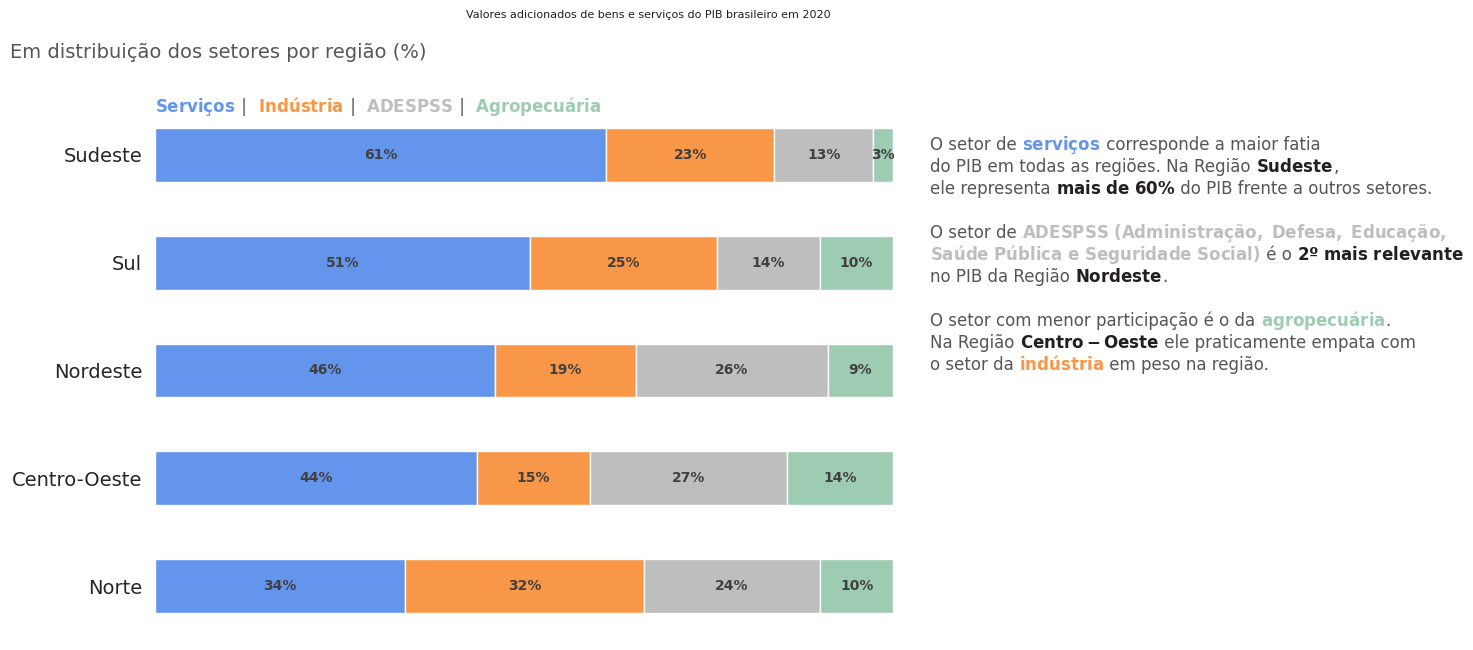

In [32]:
# Gerar o gráfico de barras empilhadas e salvando as cores que vamos utilizar no texto
ax, cores = grafico_va()

# Trabalhando com o texto colorido para legenda e anotações
# Legenda das barras
ax.legend().remove()
texto_colorido(0, 4.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)
# Anotar uma conclusão no gráfico
texto_colorido(
    1.05, 2,
    'O setor de ||$\\bf{serviços}$|| corresponde a maior fatia\n'
    'do PIB em todas as regiões. Na Região ||$\\bf{Sudeste}$||,\n'
    'ele representa ||$\\bf{mais\ de\ 60\%}$|| do PIB frente a outros setores.\n'
    '\n'
    'O setor de ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$|| é o ||$\\bf{2º\ mais\ relevante}$||\n'
    'no PIB da Região ||$\\bf{Nordeste}$||.\n'
    '\n'
    'O setor com menor participação é o da ||$\\bf{agropecuária}$||.\n'
    'Na Região ||$\\bf{Centro-Oeste}$|| ele praticamente empata com\n'
    'o setor da ||$\\bf{indústria}$|| em peso na região.',
    [[CINZA3, AZUL3, CINZA3],
     [CINZA3, CINZA1, CINZA3],
     [CINZA3, CINZA1, CINZA3],
     [CINZA3],
     [CINZA3, CINZA5],
     [CINZA5, CINZA3, CINZA1],
     [CINZA3, CINZA1, CINZA3],
     [CINZA3],
     [CINZA3, VERDE3, CINZA3],
     [CINZA3, CINZA1, CINZA3],
     [CINZA3, LARANJA1, CINZA3]
    ],
    esp=22,
    ax=ax,
    fontsize=12)

fig.show()

# Investigando a variação dos dados


Pergunta 8: Na agropecuária, como estão distribuídos seus valores adicionados por região dentro do período da base dos dados (2002 - 2020)?

In [33]:
# Selecionar os dados agrupados
df_agro = df_pib.copy()
df_agro = df_agro[['regiao', 'ano', 'va_agropecuaria']]

# Agrupar os dados por região
df_agro = pd.crosstab(index = df_agro.ano, columns = df_agro.regiao,
                      values = df_agro.va_agropecuaria, aggfunc='sum')
df_agro = (df_agro / 1e9).round(2)

df_agro.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,12.98,17.04,6.40,22.57,22.53
2003,18.70,20.98,8.14,25.71,32.42
2004,20.98,22.44,8.18,28.27,31.05
2005,17.04,22.03,8.53,28.99,24.37
2006,12.15,23.42,8.91,34.44,26.37


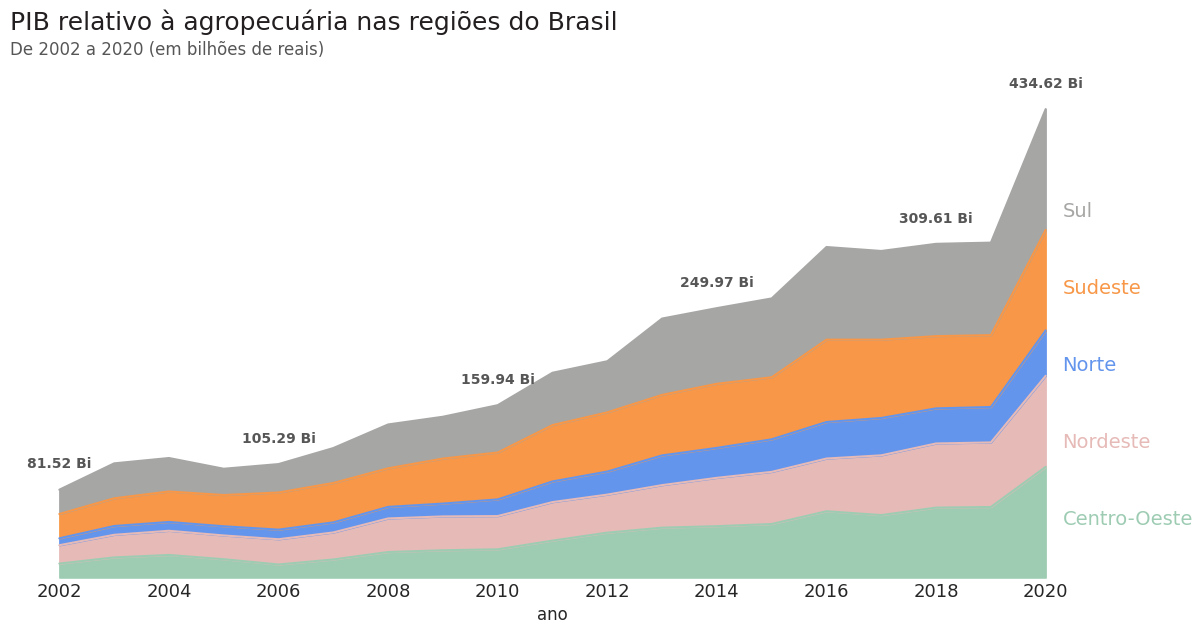

In [34]:
# Importar a biblioteca
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,7))

# Definir as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# Gerar o gráfico das áreas empilhadas
df_agro.plot(kind='area', stacked=True, color = cores, ax = ax, xticks = range(2002,2021, 2))

# Personalizar o gráfico
ax.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left')
ax.text(0.29, 0.98, 'De 2002 a 2020 (em bilhões de reais)', transform = ax.transAxes, color = CINZA3, fontsize = 12, ha='right', va='center')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 13, color = CINZA2)
ax.legend().remove()
ax.set_frame_on(False)

# Anotar os nomes da região
reg = list(reversed(df_agro.columns))
cor = list(reversed(cores))
for i in range(len(reg)):
  ax.text(0.97, (0.67 - i/7), f'{reg[i]}', fontsize=14, color = cor[i], transform=ax.transAxes)

# Descrevendo o limite mínimo e máximo do eixo y e escondendo o eixo
plt.ylim(0, 500)
ax.get_yaxis().set_visible(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Destacando os valores de 4 em 4 anos e no ano de 2020
agregado_ano = list(df_agro.sum(axis=1).round(2))
for i in range(0, len(df_agro.index), 4):
  ax.text(x = df_agro.index[i], y = agregado_ano[i] + 20, s = f"{agregado_ano[i]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")
ax.text(x = df_agro.index[-1], y = agregado_ano[-1] + 20, s = f"{agregado_ano[-1]} Bi", color = CINZA3, weight = "bold", fontsize = 10, ha="center")

plt.show()

Gráfico de inclinação

In [35]:
# Selecionar os dados desejados
df_agro_slope = df_pib.query('ano == [2002, 2020]')[['regiao', 'ano', 'va_agropecuaria']]

# Agrupar os dados por região
df_agro_slope = pd.crosstab(index = df_agro_slope.ano, columns = df_agro_slope.regiao,
                             values = df_agro_slope.va_agropecuaria, aggfunc='sum', normalize='index')
df_agro_slope = (df_agro_slope * 100).round(1)
df_agro_slope.head()

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
ano,,,,,
2002,15.9,20.9,7.9,27.7,27.6
2020,23.6,19.4,9.7,21.5,25.8


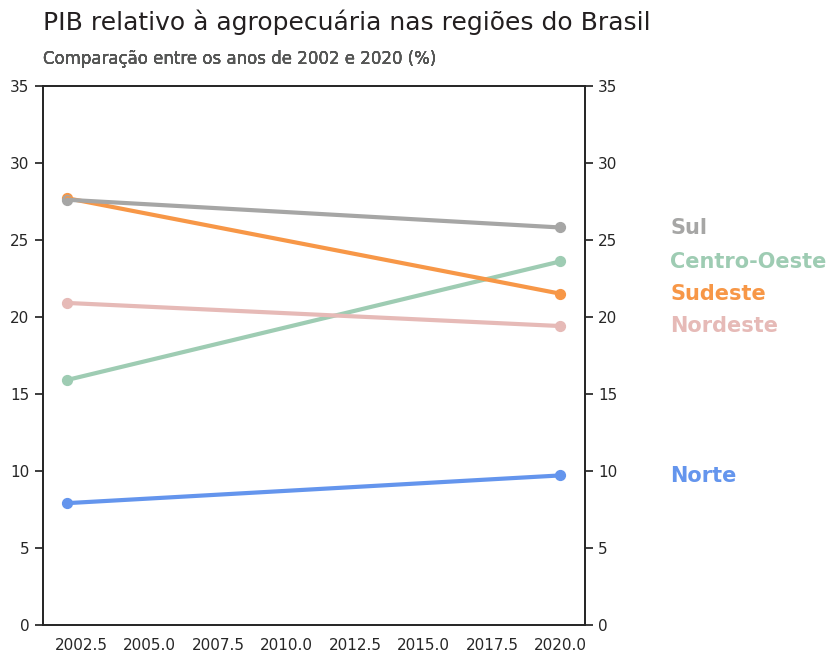

In [36]:
# Gerar a função para criar o gráfico de inclinação

def grafico_slope_agro():
  # Importar a biblioteca
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax1 = plt.subplots(figsize=(7,7))

  # Definir as cores do gráfico
  cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

  ax2 = ax1.twinx()
  ax1.set_ylim([0,35])
  ax2.set_ylim([0,35])

  for i in range(5):
    # Adicionando o ponto inicial e final
    ax1.scatter(x = df_agro_slope.index, y = df_agro_slope.iloc[:,i], color = cores[i], s = 50)

    # Adicionando a inclinação
    ax1.plot(df_agro_slope.index, df_agro_slope.iloc[:,i], color = cores[i], lw = 3)

    # Adicionando as regiões no label
    ax1.text(x = 2024, y = df_agro_slope.iloc[-1,i], s = df_agro_slope.columns[i],
                fontsize=15, fontweight = 'bold', linespacing=1.5, color=cores[i], va='center')

    ## Personalizando o gráfico
    ax1.set_title('PIB relativo à agropecuária nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
    ax1.text(0, 1.05, "Comparação entre os anos de 2002 e 2020 (%)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_agro()

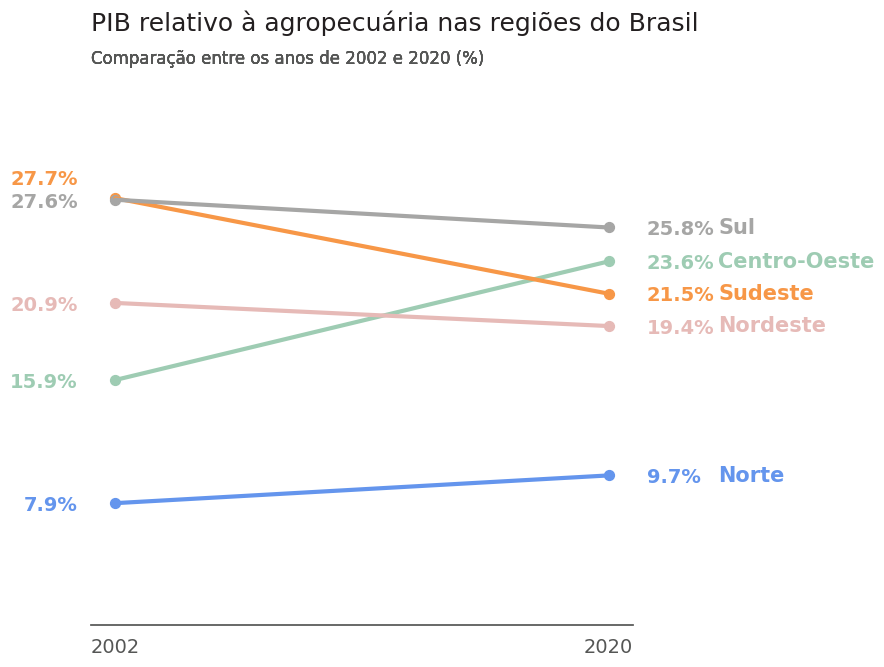

In [37]:
# Gerando o gráfico de inclinação
ax1, ax2, cores = grafico_slope_agro()

# Retirando os ticks do eixo y de ambos os lados e as bordas exceto a da base
ax1.tick_params(left = False)
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

# Ajustar as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2002, 2020], xticklabels = ['2002', '2020'],
         yticks = df_agro_slope.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 3 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_agro_slope.iloc[0,:])]
         )

# Ajustar as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_agro_slope.iloc[1,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_agro_slope.iloc[1,:])])

# Ajustar as propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustar as propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)


plt.show()

Desafio 1:

Para o primeiro desafio vamos criar um gráfico de áreas empilhadas 100% com cada a participação de cada Região no valor agregado de ADESPSS entre os anos de 2002 e 2020.

In [38]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_ind = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Selecionando os dados desejados
df_ind = df_ind[["regiao", "ano", "va_adespss"]]

# Agrupando os dados por região e ano
df_ind = pd.crosstab(index = df_ind.ano, columns = df_ind.regiao, values = df_ind.va_adespss,
                     aggfunc="sum", normalize="index")
df_ind = (df_ind*100).round(2)
df_ind = df_ind[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_ind

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


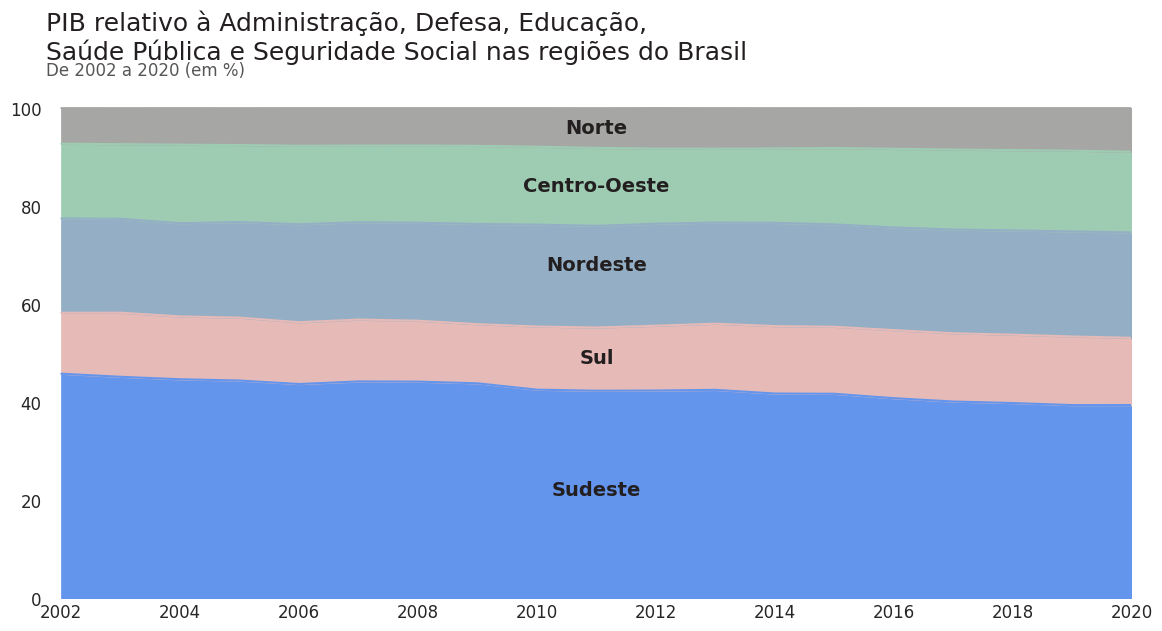

In [39]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,7))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE3, CINZA4]

# Gerando o gráfico de áreas empilhadas
df_ind.plot(kind="area", stacked=True, color = cores, ax = ax, xticks = range(2002, 2021, 2))

## Personalizando o gráfico
ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', x = 0, transform=ax.transAxes)
ax.text(0, 0.98, "De 2002 a 2020 (em %)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
plt.ylim(0, 110)              # ajustando os limites do eixo y
ax.set_xbound(2001.75,2020)   # ajustando os limites do eixo x
ax.legend().remove()
ax.set_frame_on(False)

## Anotando os nomes das regiões
reg = df_ind.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(len(reg)):
  ax.text(2011, y_pos[i], f'{reg[i]}', color = CINZA1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

Desafio 2:

Para o segundo desafio, vamos construir um gráfico de inclinação com três períodos de interesse (2010, 2015 e 2020) para a participação do PIB relativo à indústria nas regiões do Brasil. Vamos utilizar axis duplos no eixo y para conseguir editar os pontos e apresentar os dados de maneira direta, apresentando as oscilações nesses únicos pontos.

Importando e tratando os dados

In [40]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Selecionando os dados desejados
anos = [2010, 2015, 2020]
df_pib = df_pib.query("ano == @anos")[["regiao",  "ano", "va_industria"]]

# Agrupando os dados por região
df_pib = pd.crosstab(index = df_pib.ano, columns = df_pib.regiao,
                      values = df_pib.va_industria, aggfunc="sum", normalize="index")

df_pib = (df_pib * 100).round(1)
df_pib = df_pib[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]

df_pib.head()

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2010,58.8,17.1,11.6,6.1,6.5
2015,55.0,19.0,12.9,7.0,6.1
2020,52.0,19.2,12.2,7.3,9.3


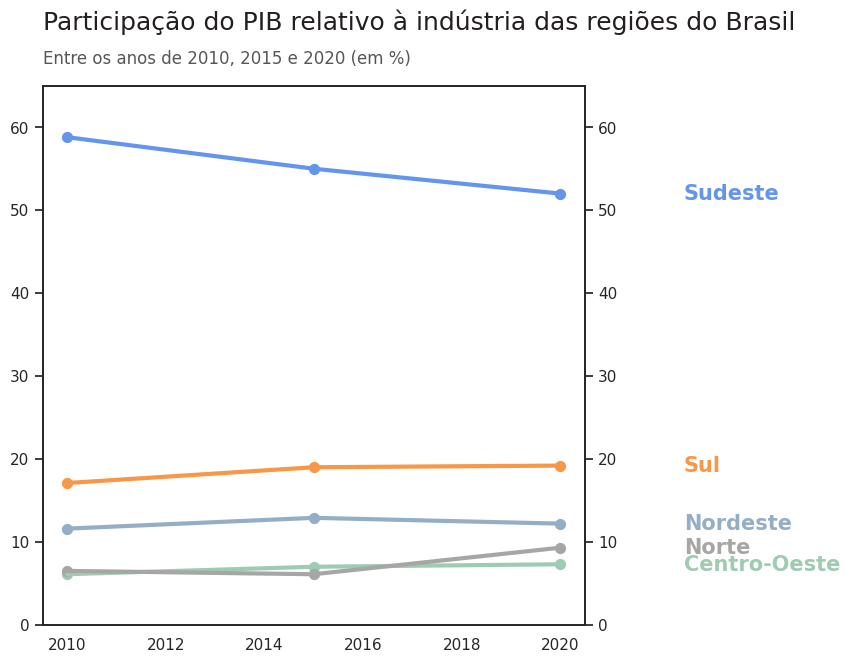

In [41]:
def grafico_slope_pib():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax1 = plt.subplots(figsize=(7,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

  # Gerando um axis duplo partilhando o eixo x e os mesmos limites em y
  ax2 = ax1.twinx()
  ax1.set_ylim([0,65])
  ax2.set_ylim([0,65])

  # Gerando o gráfico de inclinação (pontos + curva + texto)
  for i in range(5):
    # Adicionando o ponto inicial e final
    ax1.scatter(x = df_pib.index, y = df_pib.iloc[:,i], color = cores[i], s = 50)

    # Adicionando a inclinação
    ax1.plot(df_pib.index, df_pib.iloc[:,i], color = cores[i], lw = 3)

    # Adicionando as regiões no label
    ax1.text(x = 2022.5, y = df_pib.iloc[-1,i], s = df_pib.columns[i],
            fontsize=15, fontweight = 'bold', color=cores[i], va='center')

  ## Personalizando o gráfico
  ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
  ax1.text(0, 1.05, "Entre os anos de 2010, 2015 e 2020 (em %)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_pib()

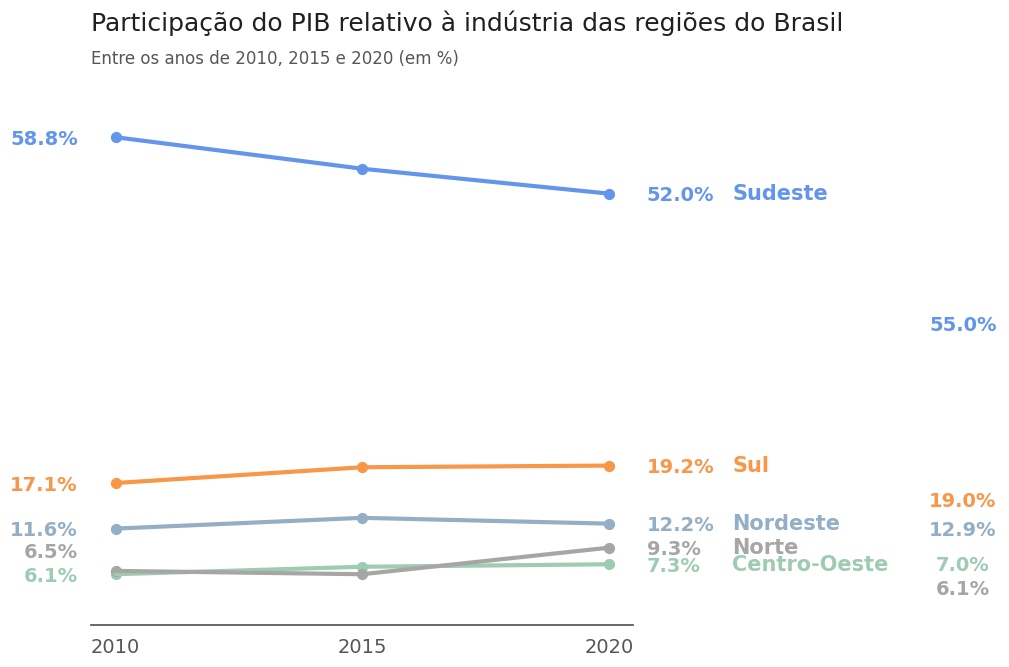

In [42]:
# Gerando o gráfico de inclinação
ax1, ax2, cores = grafico_slope_pib()

# Retirando os ticks do eixo y de ambos os lados e as bordas exeto a da base
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2010, 2015, 2020], xticklabels = ["2010", "2015", "2020"],
         yticks = df_pib.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 4 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_pib.iloc[0,:])])

# Ajustando as propriedades do dos pontos centrais
valores = df_pib.iloc[1,:].values
y_pos = [53, 17, 11, 4,-1]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = "bold", fontsize = 14, color = cores[i], ha="center", transform=ax.transData)

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_pib.iloc[2,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_pib.iloc[2,:])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()

# Relacionando dados

In [43]:
import pandas as pd

In [44]:
# Importar o conjunto de dados com os dados do IDEB nacional de provas realizadas de 2005 a 2021
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

ideb.head(6)

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9
5,2005,Centro-Oeste,privada,medio,EM,92.4,0.943179,338.52,309.85,6.082840,5.7


In [45]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          270 non-null    int64  
 1   regiao                       270 non-null    object 
 2   rede                         270 non-null    object 
 3   ensino                       270 non-null    object 
 4   anos_escolares               270 non-null    object 
 5   taxa_aprovacao               270 non-null    float64
 6   indicador_rendimento         270 non-null    float64
 7   nota_saeb_matematica         270 non-null    float64
 8   nota_saeb_lingua_portuguesa  270 non-null    float64
 9   nota_saeb_media_padronizada  270 non-null    float64
 10  ideb                         270 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 23.3+ KB


 **Questionamentos**

2- Qual a relação entre as notas das disciplinas de língua portuguesa e matemática no SAEB por região no Ensino Fundamental Anos Iniciais? Conseguimos traçar algum paralelo entre elas?

3- Qual seria a relação entre a taxa de aprovação e a média da nota do SAEB no Ensino Fundamental Anos Finais? Conseguimos notar como as duas se distribuem em relação ao IDEB e as regiões?

1- Qual a relação entre o IDEB e o indicador de rendimento das escolas no ensino médio? É positiva, negativa ou não estão correlacionadas?

In [47]:
# Visualizando os dados
ideb_em = ideb.query("anos_escolares == 'EM'")[['indicador_rendimento', 'ideb']]
ideb_em = ideb_em.reset_index(drop = True)
ideb_em.head()

,indicador_rendimento,ideb
0,0.695138,2.9
1,0.943179,5.7
2,0.730819,2.7
3,0.916831,5.2
4,0.737045,2.7


In [50]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de dispersão com uma reta representando um modelo de regressão linear (OLS - Mínimos Quadrados Ordinários)
fig = px.scatter(ideb_em, x="ideb", y="indicador_rendimento", trendline = 'ols',
                 color_discrete_sequence = [AZUL3], trendline_color_override=CINZA3,
                 labels = {"ideb":"IDEB", "indicador_rendimento":"Indicador de Rendimento"})

# Ajustando o layout do gráfico
fig.update_layout(width=1000, height=500, yaxis_range = [0, 1.1], xaxis_range = [2.5, 7.5],
                  margin = dict(t=100), font_size=14, font_color= CINZA2,
                  title_font_color= CINZA1, title_font_size=24,
                  title_text='Relação entre o IDEB e o indicador de rendimento das escolas' +
                             '<br><sup size=1 style="color:#555655">Do Ensino Médio (EM) entre os anos de 2005 a 2021</sup>',
                  xaxis_title='IDEB (0-10)', yaxis_title='Indicador de Rendimento (0-1)')

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>IDEB:</b> %{x} <br><b>Indicador de Rend:</b> %{y}", selector = dict(type='scatter', mode = "markers"))

fig.add_annotation(text='Fonte dos dados: <a href="https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/saeb">'
                        'Sistema de Avaliação da Educação Básica (Saeb)</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.15, showarrow=False, font_size=10)

fig.show()

In [52]:
ideb_efai = ideb.query("anos_escolares == 'EFAI'")[['regiao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa']]
ideb_efai = ideb_efai.reset_index(drop = True)
ideb_efai.head()

,regiao,nota_saeb_matematica,nota_saeb_lingua_portuguesa
0,Centro-Oeste,185.38,172.13
1,Centro-Oeste,223.64,210.36
2,Nordeste,162.61,156.61
3,Nordeste,211.16,199.88
4,Norte,166.39,161.30


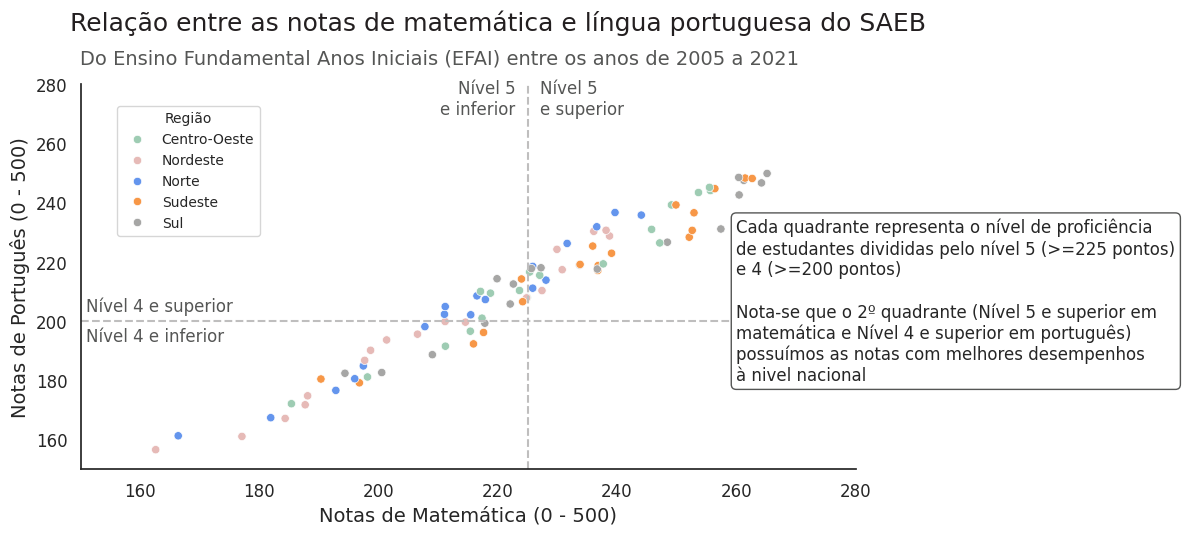

In [54]:
# Definir as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Definir as cores
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')

# Gerar o gráfico de dispersão com cores como categorias
ax = sns.scatterplot(data = ideb_efai, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'regiao', palette = cores)

# Personalizar o gráfico
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.97, y = 1.03)
plt.title('Do Ensino Fundamental Anos Iniciais (EFAI) entre os anos de 2005 a 2021', fontsize=14, color=CINZA3, pad = 15, loc = "left")
ax.legend(bbox_to_anchor=(155, 275), title='Região', title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_xlim(150, 280)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_ylim(150, 280)
sns.despine()

# Limites das notas em no eixo y (notas de português) - 200 pontos (proficiência)
ax.text(ax.get_xlim()[0] + 1, 202, 'Nível 4 e superior', fontsize=12, color = CINZA3, va = "bottom")
ax.text(ax.get_xlim()[0] + 1 , 198, 'Nível 4 e inferior', fontsize=12, color = CINZA3, va = "top")
plt.axhline(y = 200, color = CINZA5, linestyle='--')

# Limites das notas em no eixo x (notas de matemática) - 225 pontos (proficiência)
ax.text(223, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize=12, color = CINZA3, ha="right")
ax.text(227, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize=12, color = CINZA3, ha="left")
plt.axvline(x = 225, color = CINZA5, linestyle='--')

# Adicionar um texto explicando a divisão de quadrantes e o que significa
ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=225 pontos)\ne 4 (>=200 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(260, 180), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

In [56]:
# Selecionando os dados desejados do dataframe
ideb_efaf = ideb.query("anos_escolares == 'EFAF'")[['regiao', 'taxa_aprovacao', 'nota_saeb_media_padronizada', 'ideb']]
ideb_efaf = ideb_efaf.reset_index(drop=True)
ideb_efaf.head()

,regiao,taxa_aprovacao,nota_saeb_media_padronizada,ideb
0,Centro-Oeste,72.1,4.356453,3.1
1,Centro-Oeste,94.4,5.840183,5.5
2,Nordeste,66.8,3.925063,2.6
3,Nordeste,92.2,5.796700,5.3
4,Norte,75.3,4.097388,3.1


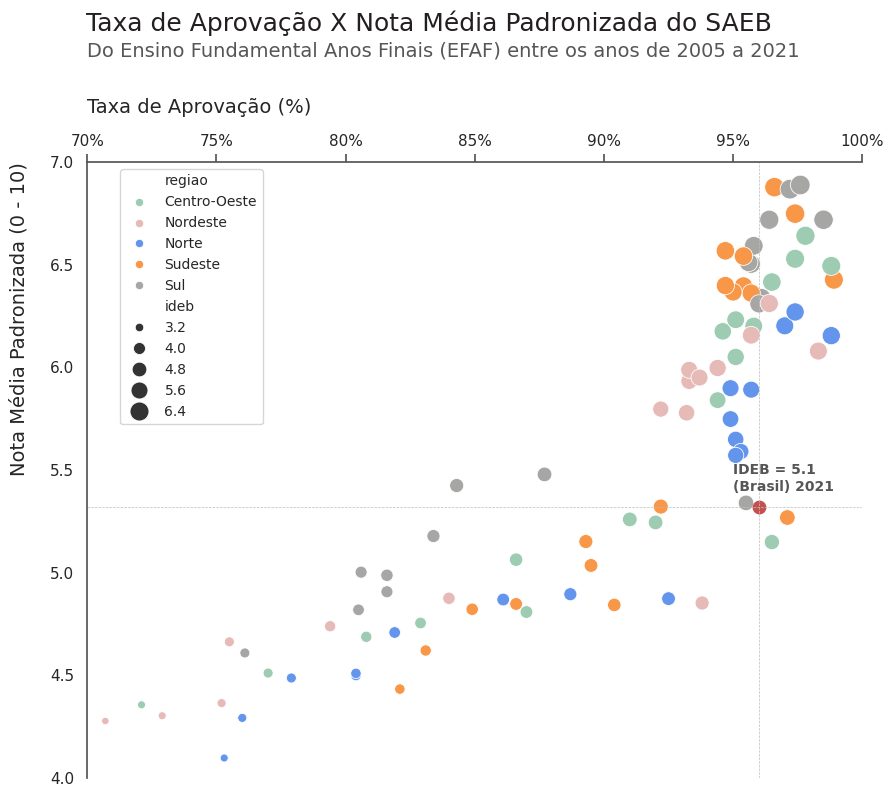

In [62]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,8))

# Definir as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# Gerar o gráfico de bolhas
ax = sns.scatterplot(data = ideb_efaf, x = "taxa_aprovacao", y = "nota_saeb_media_padronizada", hue = "regiao", size = "ideb", sizes=(10,200), palette = cores)

# Adicionar o IDEB nacional (Taxa * Nota Padronizada)
ax.scatter([96], [5.32], color=VERMELHO1, s=80)
plt.axvline(x=96, color = CINZA5, linestyle='--', linewidth=0.5) # adicionando linhas de referência do IDEB nacional
plt.axhline(y=5.32, color = CINZA5, linestyle='--', linewidth=0.5) # adicionando linhas de referência do IDEB nacional
ax.text(95, 5.4, 'IDEB = 5.1\n(Brasil) 2021', color=CINZA3, fontsize=10, fontweight='bold')

## Personalizar o gráfico
plt.suptitle('Taxa de Aprovação X Nota Média Padronizada do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 1.07)
plt.title('Do Ensino Fundamental Anos Finais (EFAF) entre os anos de 2005 a 2021', fontsize=14, color=CINZA3, pad = 30, loc = "left")
ax.legend(bbox_to_anchor=(71, 7), fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.xaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.set_xlim(70, 100)
ax.set_ylim(4, 7)

# Propriedades dos eixos x e y
xticks = np.arange(70, 105, 5)
yticks = np.arange(4, 7.5, 0.5)
plt.setp(ax, xticks=xticks, xticklabels=[str(i)+'%' for i in xticks], yticks=yticks)

# Ajustar a aparência dos ticks e tick labels
ax.tick_params(top=True, bottom=False, labelbottom=False, labeltop=True)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Taxa de Aprovação (%)', fontsize = 14, loc="left", labelpad = 15)
ax.set_ylabel('Nota Média Padronizada (0 - 10)', fontsize = 14, loc="top", labelpad = 15)

# Remover bordas da direita e base e alterando as cores da borda esquerda e do topo
ax.spines[['right', "bottom"]].set_visible(False)
ax.spines[['left', "top"]].set_color(CINZA3)

plt.show()